In [2]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# <font color='blue'>**1. Business Understanding**</font>
---

Company ZYX wants to create targeted marketing campaigns and also needs to allocate their marketing resources efficiently, but Company ZYX recognizes that not all customers have the same needs, preferences, or purchasing behaviors

### **Business Objective**
---

- Company ZYX aims to personalize marketing strategies to increase customer retention and maximize revenue with effective marketing spending in the next 3 months
- The company also wants to identify high-value customers to give them personalized marketing

### **Business Questions / Problem Statement**
---

- How can we effectively segment our customer base to better understand customer behavior and implement targeted marketing strategies?

### **Define the Problem**
---

1. **What are the inputs?** Purchasing behavior records: recency, frequency, and monetary.
2. **What are the outputs?** Customer segments
3. **What do we do with the segmentation?** Marketing team will treat each segment based on their characteristics, e.g. create a loyalty coupon

# **<font color='Blue'>2. Modelling Workflow </font>**
---

## **Machine Learning Workflow** (Simplified)

### 1. Importing Data to Python</font>
- Data validation

### 2. Exploratory Data Analysis</font>
- Data exploration

### 3. Data Preprocessing</font>
- Missing value handling
- Feature engineering
- Normalization

### 4. Modeling</font>
- Finding the best model

### 5. Recommendation</font>
- Business recommendations
- Actionable insights

# <font color='Blue'> **3. Importing data to Python** </font>
---

## **3.1 Data Description**
---

- `ID`: Customer’s unique identifier.
- `Year_Birth`: Customer's birth year.
- `Education`: Education Qualification of customer.
- `Marital_Status`:tMarital Status of customer.
- `Income`: Customer's yearly household income.
- `Kidhome`: Number of children in customer's household.
- `Teenhome`: Number of teenagers in customer's household.
- `Dt_Customer`: Date of customer's enrollment with the company.
- `Recency`: Number of days since customer's last purchase.
- `MntWines`: Amount spent on wine.
- `NumDealsPurchase`: Number of purchases made with discount.
- `NumWebPurchases` : Number of purchases made through company's web site.
- `NumCatalogPurchases` : Number of purchases made using catalogue.
- `NumStorePurchases` : Number of purchases made directly in stores.
- `NumWebVisitsMonth`: Number of visits to company's web site in the last month.
- `AcceptedCmp1` : 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
- `Complain` : 1 if customer complained in the last 2 years.
- `Response` : 1 if customer accepted the offer in the last campaign, 0 otherwise.

### **Preprocessed data:**
---
- **Frequency** <br>
It measures how often a customer engages with the business. Frequency = Count number of transactions customer

- **Recency** <br>
It measures how recently a customer has engaged with the business. Recency = Reference date (e.g., today) - Customer last purchase date

- **Monetary** <br>
It refers to the total monetary value of a customer's transactions or purchases. Monetary = Product Price * Quantity Order

## **3.2 Import Data**
---

In [3]:
# Input csv_path
csv_path = 'marketing_campaign.csv'

# Read the CSV file with tab delimiter
data = pd.read_csv(csv_path, sep='\t')

# Assume we need to drop some columns since we don't have a clear description about the column
# Drop a specific column by name
column_to_drop = ['Z_CostContact', 'Z_Revenue']
data = data.drop(column_to_drop, axis=1)

# Display the first few rows of the DataFrame
print(data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  Accepted

**Check for duplicate data**

In [4]:
# check data duplicate
data.duplicated().sum()

0

There are no duplicates



Then, **we check the data type**

In [5]:
# check data type
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

We know that
- `Dt_Customer` is a time series data, change the data type to time series.

In [6]:
# Convert 'Dt_Customer' column to datetime with the correct format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

# change the data types for Dt_Customer
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# validate the data types
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response    

# <font color='Blue'> **4. Exploratory Data Analysis** </font>
---

Copy the data first, so that we wouldn't overwrite the current data

In [7]:
eda_data = data.copy()

# validate
print('Original data shape :', data.shape)
print('EDA data shape      :', eda_data.shape)

Original data shape : (2240, 27)
EDA data shape      : (2240, 27)


## **EDA - PART 1**
---

### **4.1. Check for data descriptions**
---

In [8]:
eda_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Summary**
- The third quartile data in the "Income" column differs significantly from its maximum value.
- There are some potential outliers on the data.
- We have to exclude them.

### **4.2. Check for missing values**
---

In [9]:
eda_data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

`Income` has some missing values. Let's check the data with missing `Income`.

In [10]:
eda_data[eda_data['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,0


- We suspected the presence of outliers in `Income`.
- Imputing with the mean is sensitive to outliers.
- Let's check the distribution of the data.

<Axes: xlabel='Income', ylabel='Count'>

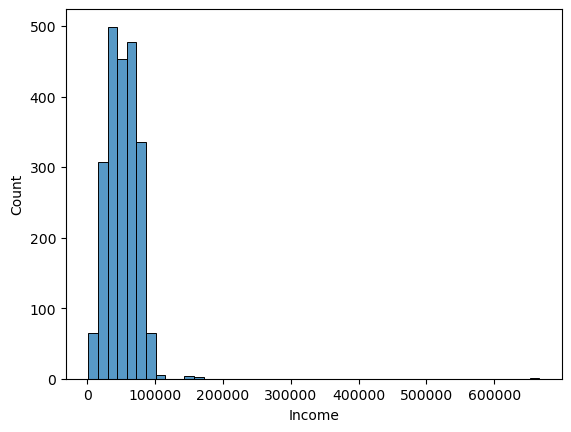

In [11]:
# Define num_bins using Square Root Rule
num_bins = int(np.sqrt(len(eda_data)))

# Check the distribution of Income
sns.histplot(data = eda_data, x = "Income", bins=num_bins)

- The data is **normally distributed**.
- We can perform imputation by using the mean value from the available data.

In [12]:
# Calculate the mean of the column containing missing values ('Income')
mean_value = eda_data['Income'].mean()

# Replace missing values in the column with the mean value
eda_data['Income'].fillna(mean_value, inplace=True)

# Validate imputation
eda_data[eda_data['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


We've perfomed imputation, no more missing values

### **4.3. Create RFM Features**
---

- **Recency** (R) <br>
Recency refers to the time elapsed since a customer's last interaction or transaction with a company.
It measures **how recently a customer has engaged** with the business. To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

- **Frequency** (F)<br>
Frequency represents the number of transaction occurs.
It measures **how often a customer engages** with the business. To do that we need to check how many purchases are registered by the same customer.

- **Monetary** (M)<br>
Monetary refers to the **total monetary value of a customer's transactions** or purchases.


<br>

*Reference:*<br>
Christy, A.J., Umamakeswari, A., Priyatharsini, L., Neyaa, A., RFM Ranking – An Effective Approach to Customer Segmentation, Journal of King Saud University - Computer and Information Sciences (2018),

**Calculate Recency**

Since we don't have details about when customers made transactions, assume we can use data in `Recency` column.

In [37]:
# 'new_df' now contains only the 'ID' and 'TotalPurchases' columns
recency_df = eda_data[['ID', 'Recency']].copy()
recency_df.reset_index(drop=True, inplace=True)

print (recency_df)

         ID  Recency
0      5524       58
1      2174       38
2      4141       26
3      6182       26
4      5324       94
...     ...      ...
2235  10870       46
2236   4001       56
2237   7270       91
2238   8235        8
2239   9405       40

[2240 rows x 2 columns]


**Calculate Frequency**

In [47]:
# Group by 'ID' and calculate the sum for each group
frequency_df = eda_data.groupby('ID')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index()

# Create a new column 'Frequency' by summing the specified columns
frequency_df['Frequency'] = frequency_df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Keep only the 'ID' and 'Frequency' columns
frequency_df = frequency_df[['ID', 'Frequency']]

print(frequency_df)

         ID  Frequency
0         0         17
1         1         18
2         9         11
3        13          6
4        17         28
...     ...        ...
2235  11178          5
2236  11181          0
2237  11187          9
2238  11188          9
2239  11191          8

[2240 rows x 2 columns]


**Calculate Monetary**

In [49]:
# Group by 'ID' and calculate the sum for each group
monetary_df = eda_data.groupby('ID')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().reset_index()

# Create a new column 'Monetary' by summing the specified columns
monetary_df['Monetary'] = monetary_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Keep only the 'ID' and 'Monetary' columns
monetary_df = monetary_df[['ID', 'Monetary']]

print(monetary_df)

         ID  Monetary
0         0      1198
1         1       577
2         9       120
3        13        32
4        17      1028
...     ...       ...
2235  11178        32
2236  11181         8
2237  11187        69
2238  11188        89
2239  11191       139

[2240 rows x 2 columns]


### **4.4. Create RFM Table**
---

In [51]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='ID')
print(temp_df)

         ID  Recency  Frequency
0      5524       58         25
1      2174       38          6
2      4141       26         21
3      6182       26          8
4      5324       94         19
...     ...      ...        ...
2235  10870       46         18
2236   4001       56         22
2237   7270       91         19
2238   8235        8         23
2239   9405       40         11

[2240 rows x 3 columns]


In [52]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='ID')
#use ID as index
rfm_df.set_index('ID',inplace=True)
#check the head
print(rfm_df)

       Recency  Frequency  Monetary
ID                                 
5524        58         25      1617
2174        38          6        27
4141        26         21       776
6182        26          8        53
5324        94         19       422
...        ...        ...       ...
10870       46         18      1341
4001        56         22       444
7270        91         19      1241
8235         8         23       843
9405        40         11       172

[2240 rows x 3 columns]


### **4.5. Customer segments with RFM Mode**
---

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

**RFM Quartiles**

In [54]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,24.0,8.0,68.75
0.50,49.0,15.0,396.00
0.75,74.0,21.0,1045.50


In [55]:
quantiles.to_dict()

{'Recency': {0.25: 24.0, 0.5: 49.0, 0.75: 74.0},
 'Frequency': {0.25: 8.0, 0.5: 15.0, 0.75: 21.0},
 'Monetary': {0.25: 68.75, 0.5: 396.0, 0.75: 1045.5}}

**Creation of RFM Segments**

We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good.

In [56]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [57]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [58]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
ID,,,,,,
5524,58,25,1617,2,4,4
2174,38,6,27,3,1,1
4141,26,21,776,3,3,3
6182,26,8,53,3,1,1
5324,94,19,422,1,3,3


Now that we have the score of each customer, we can represent our customer segmentation. First, we need to combine the scores (R_Quartile, F_Quartile,M_Quartile) together.

In [59]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
ID,,,,,,,
5524,58,25,1617,2,4,4,244
2174,38,6,27,3,1,1,311
4141,26,21,776,3,3,3,333
6182,26,8,53,3,1,1,311
5324,94,19,422,1,3,3,133


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

Let's see who are our Champions (best customers).

In [60]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
ID,,,,,,,
10133,16,25,2349,4,4,4,444
7919,2,23,2092,4,4,4,444
3690,20,22,2091,4,4,4,444
5031,14,26,1833,4,4,4,444
380,17,29,1804,4,4,4,444
3667,20,25,1757,4,4,4,444
4931,13,28,1730,4,4,4,444
1501,21,44,1717,4,4,4,444
9260,20,27,1706,4,4,4,444


We can find here a suggestion of key segments and then we can decide which segment to consider for further study.

Note: the suggested link use the opposite valuation: 1 as highest/best score and 4 is the lowest.

**How many customers do we have in each segment?**

In [61]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  51
Loyal Customers:  512
Big Spenders:  560
Almost Lost:  65
Lost Customers:  79
Lost Cheap Customers:  129


Now that we knew our customers segments we can choose how to target or deal with each segment.

For example:

Best Customers - Big Spenders: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".

Almost Lost: Send them personalized emails to encourage them to shop.